In [322]:
___Author___='LumberJack Jyss'

In [323]:
print('LumberJack BRUTAL AtidotCom XGBOOST\nLumberJack Jyss (c)')

LumberJack BRUTAL AtidotCom XGBOOST
LumberJack Jyss (c)


In [324]:
print('Importation des librairies...')
import statistics
import pickle
import numpy as np
import pandas as pd
import xgboost as xgb
from pandas.plotting import register_matplotlib_converters
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,roc_curve
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
#from sklearn.grid_search import GridSearchCV
import seaborn as sns

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

%matplotlib inline
print('Librairies importées')

Importation des librairies...
Librairies importées


In [325]:
df = pd.read_csv('dataset_ready_to_use.csv')

In [326]:
df = df.dropna()
df.iloc[0].column=['Date']
#df = df.drop(['Open_spy','High_spy','Low_spy'],axis=1)

In [327]:
df.head()

,Date,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,...,rsi,atr14,wclprice,BBup,BBmid,BBlow,instant_trendline,Adj Close,short,long
0,1997-08-06,0,0,0,0,0,0,0,0,0,...,70.202393,1.335446,95.914022,96.251777,94.933998,93.616219,93.058857,64.911682,0,0
1,1997-08-07,0,0,0,0,0,0,0,0,0,...,64.195984,1.347200,95.593750,96.241224,95.076365,93.911506,93.350937,64.425888,0,0
2,1997-08-08,0,0,0,0,-1,0,0,0,0,...,51.422791,1.458565,93.476549,96.452861,95.010399,93.567937,93.608074,63.116245,1,0
3,1997-08-11,0,0,0,0,0,0,0,0,0,...,54.855317,1.472681,93.757799,96.483212,94.986099,93.488987,93.792447,63.580952,1,0
4,1997-08-12,0,0,0,0,0,0,0,0,0,...,47.044547,1.515925,93.035124,96.761583,94.670133,92.578683,93.902052,62.567059,1,0


In [328]:
df.set_index('Date', inplace=True)
df = df.iloc[:,1:]
df.head()

,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,...,rsi,atr14,wclprice,BBup,BBmid,BBlow,instant_trendline,Adj Close,short,long
Date,,,,,,,,,,,,,,,,,,,,,
1997-08-06,0,0,0,0,0,0,0,0,0,0,...,70.202393,1.335446,95.914022,96.251777,94.933998,93.616219,93.058857,64.911682,0,0
1997-08-07,0,0,0,0,0,0,0,0,0,0,...,64.195984,1.347200,95.593750,96.241224,95.076365,93.911506,93.350937,64.425888,0,0
1997-08-08,0,0,0,-1,0,0,0,0,0,0,...,51.422791,1.458565,93.476549,96.452861,95.010399,93.567937,93.608074,63.116245,1,0
1997-08-11,0,0,0,0,0,0,0,0,0,0,...,54.855317,1.472681,93.757799,96.483212,94.986099,93.488987,93.792447,63.580952,1,0
1997-08-12,0,0,0,0,0,0,0,0,0,0,...,47.044547,1.515925,93.035124,96.761583,94.670133,92.578683,93.902052,62.567059,1,0


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5465 entries, 1997-08-06 to 2019-04-25
Data columns (total 73 columns):
CDL3BLACKCROWS         5465 non-null int64
CDL3INSIDE             5465 non-null int64
CDL3LINESTRIKE         5465 non-null int64
CDL3OUTSIDE            5465 non-null int64
CDL3STARSINSOUTH       5465 non-null int64
CDL3WHITESOLDIERS      5465 non-null int64
CDLABANDONEDBABY       5465 non-null int64
CDLADVANCEBLOCK        5465 non-null int64
CDLBELTHOLD            5465 non-null int64
CDLBREAKAWAY           5465 non-null int64
CDLCLOSINGMARUBOZU     5465 non-null int64
CDLCONCEALBABYSWALL    5465 non-null int64
CDLCOUNTERATTACK       5465 non-null int64
CDLDARKCLOUDCOVER      5465 non-null int64
CDLDOJI                5465 non-null int64
CDLDOJISTAR            5465 non-null int64
CDLDRAGONFLYDOJI       5465 non-null int64
CDLENGULFING           5465 non-null int64
CDLEVENINGDOJISTAR     5465 non-null int64
CDLEVENINGSTAR         5465 non-null int64
CDLGAPSIDESIDEWHITE    

In [375]:
delta = df.shape[0]
bloc1 = round(delta*0.84)
bloc2 = delta - bloc1
print("Période d'étude : ",delta,'périodes')
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' périodes \nBloc 2 :',bloc2,' périodes')

Période d'étude :  5465 périodes
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  4591  périodes 
Bloc 2 : 874  périodes


In [376]:
df['long'].sum(),df['short'].sum()

(748, 1084)

In [377]:
Xtrain_long = df.iloc[:bloc1,:70]
#Xtrain_long = Xtrain_long.drop(['short'],axis=1)
Xtest_long = df.iloc[bloc1:,:70]
#Xtest_long = Xtest_long.drop(['short'],axis=1)
ytrain_long = df.iloc[:bloc1,-1]
ytest_long = df.iloc[bloc1:,-1]

In [378]:
df.head()

,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,...,rsi,atr14,wclprice,BBup,BBmid,BBlow,instant_trendline,Adj Close,short,long
Date,,,,,,,,,,,,,,,,,,,,,
1997-08-06,0,0,0,0,0,0,0,0,0,0,...,70.202393,1.335446,95.914022,96.251777,94.933998,93.616219,93.058857,64.911682,0,0
1997-08-07,0,0,0,0,0,0,0,0,0,0,...,64.195984,1.347200,95.593750,96.241224,95.076365,93.911506,93.350937,64.425888,0,0
1997-08-08,0,0,0,-1,0,0,0,0,0,0,...,51.422791,1.458565,93.476549,96.452861,95.010399,93.567937,93.608074,63.116245,1,0
1997-08-11,0,0,0,0,0,0,0,0,0,0,...,54.855317,1.472681,93.757799,96.483212,94.986099,93.488987,93.792447,63.580952,1,0
1997-08-12,0,0,0,0,0,0,0,0,0,0,...,47.044547,1.515925,93.035124,96.761583,94.670133,92.578683,93.902052,62.567059,1,0


In [379]:
Xtrain_short = df.iloc[:bloc1,:70]
#Xtrain_short = Xtrain_short.drop(['Adj Close'],axis=1)
Xtest_short = df.iloc[bloc1:,:70]
#Xtest_short = Xtest_short.drop(['Adj Close'],axis=1)
ytrain_short = df.iloc[:bloc1,-2]
ytest_short = df.iloc[bloc1:,-2]
print('Split effectué')

Split effectué


In [380]:
ytrain_long.shape,Xtrain_long.shape,Xtest_long.shape,ytest_long.shape

((4591,), (4591, 70), (874, 70), (874,))

In [381]:
ytrain_short.shape,Xtrain_short.shape,Xtest_short.shape,ytest_short.shape

((4591,), (4591, 70), (874, 70), (874,))

In [382]:
model_long = XGBClassifier(silent=False,objective='binary:logistic',n_estimators=200)

In [383]:
model_short = XGBClassifier(silent=False,objective='binary:logistic',n_estimators=200)

In [384]:
eval_set_long=[(Xtrain_long, ytrain_long), (Xtest_long, ytest_long)]

In [385]:
eval_set_short=[(Xtrain_short, ytrain_short), (Xtest_short, ytest_short)]

In [386]:
model_long.fit( Xtrain_long, ytrain_long, eval_metric=['auc','error','logloss'], eval_set=eval_set_long, verbose=0)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1)

In [387]:
model_short.fit( Xtrain_short, ytrain_short, eval_metric=['auc','error','logloss'], eval_set=eval_set_short, verbose=0)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1)

In [390]:
predictions_long = model_long.predict(Xtest_long)
accuracy_long = accuracy_score(ytest_long, predictions_long)
precision_long=precision_score(ytest_long, predictions_long) # vrais_positifs/(vrais_positifs+faux_positifs)
# La précision permet de mesurer la capacité du modèle à refuser résultats non-pertinents.
recall_long=recall_score(ytest_long, predictions_long) # (vrai_positifs/(vrais_positifs+faux_négatifs))
roc_long=roc_auc_score(ytest_long,predictions_long)
print('RESULTATS LONG\n')
print('Accuracy: %.2f%%' % (accuracy_long * 100.0))
print("Precision: %.2f%% " % (precision_long *100),' => Discrimnination des vrais positifs')
print("Recall: %.2f%% " % (recall_long * 100),' => Combien ont été trouvé sur toutes les positifs existants')
print("AUC: %.2f%% " % (roc_long *100))
# get probabilities for positive class
prediction_long = model_long.predict_proba(Xtest_long)
roc_long2 = roc_auc_score(ytest_long, prediction_long[:,1])
print("AUC_proba: %.2f%% " % (roc_long2 * 100))
print(classification_report(ytest_long, predictions_long))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(ytest_long, predictions_long))
print('Matrice de confusion :')
conf_matrix

RESULTATS LONG

Accuracy: 93.82%
Precision: 71.43%   => Discrimnination des vrais positifs
Recall: 8.77%   => Combien ont été trouvé sur toutes les positifs existants
AUC: 54.26% 
AUC_proba: 90.22% 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       817
           1       0.71      0.09      0.16        57

   micro avg       0.94      0.94      0.94       874
   macro avg       0.83      0.54      0.56       874
weighted avg       0.93      0.94      0.91       874

[[815   2]
 [ 52   5]]
Matrice de confusion :


,Vrais_estimés,Faux_estimés
vrais_réels,Vrais_positifs,Faux_négatif
Faux_réels,Faux_positifs,Vrais-négatifs


In [392]:
predictions_short = model_short.predict(Xtest_short)
accuracy_short = accuracy_score(ytest_short, predictions_short)
precision_short=precision_score(ytest_short, predictions_short) # vrais_positifs/(vrais_positifs+faux_positifs)
# La précision permet de mesurer la capacité du modèle à refuser résultats non-pertinents.
recall_short = recall_score(ytest_short, predictions_short) # (vrai_positifs/(vrais_positifs+faux_négatifs))
roc_short=roc_auc_score(ytest_short,predictions_short)
print('RESULTATS SHORT\n')
print('Accuracy: %.2f%%' % (accuracy_short * 100.0))
print("Precision: %.2f%% " % (precision_short *100),' => Discrimnination des vrais positifs')
print("Recall: %.2f%% " % (recall_short * 100),' => Combien ont été trouvé sur toutes les positifs existants')
print("AUC: %.2f%% " % (roc_short *100))
# get probabilities for positive class
prediction_short = model_short.predict_proba(Xtest_short)
roc_short2 = roc_auc_score(ytest_short, prediction_short[:,1])
print("AUC_proba: %.2f%% " % (roc_short2 * 100))
print(classification_report(ytest_short, predictions_short))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(ytest_short, predictions_short))
print('Matrice de confusion :')
conf_matrix

RESULTATS SHORT

Accuracy: 94.05%
Precision: 77.27%   => Discrimnination des vrais positifs
Recall: 57.95%   => Combien ont été trouvé sur toutes les positifs existants
AUC: 78.02% 
AUC_proba: 96.26% 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       786
           1       0.77      0.58      0.66        88

   micro avg       0.94      0.94      0.94       874
   macro avg       0.86      0.78      0.81       874
weighted avg       0.94      0.94      0.94       874

[[771  15]
 [ 37  51]]
Matrice de confusion :


,Vrais_estimés,Faux_estimés
vrais_réels,Vrais_positifs,Faux_négatif
Faux_réels,Faux_positifs,Vrais-négatifs


In [280]:
type(predictions_long),len(predictions_long), predictions_long.sum()

(numpy.ndarray, 1093, 6)

In [281]:
type(predictions_short),len(predictions_short), predictions_short.sum()

(numpy.ndarray, 1093, 135)

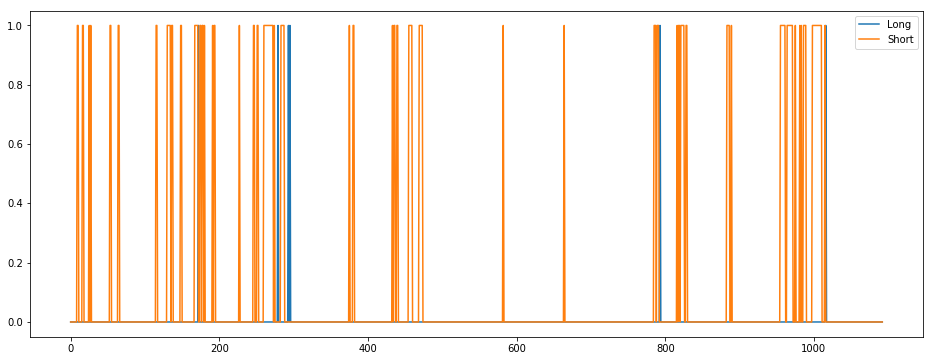

In [282]:
plt.figure(figsize=(16,6))
plt.plot(predictions_long,label = 'Long')
plt.plot(predictions_short,label = 'Short')
plt.legend()

In [283]:
backtest = pd.DataFrame()
backtest['Close_SPY'] = df['Adj Close']
backtest['long'] = df['long']
backtest['short'] = df['short']
backtest.head()

,Close_SPY,long,short
Date,,,
1997-08-06,64.911682,0,0
1997-08-07,64.425888,0,0
1997-08-08,63.116245,0,1
1997-08-11,63.580952,0,1
1997-08-12,62.567059,0,1


In [284]:
backtest = backtest.iloc[bloc1:,:]
backtest.head()

,Close_SPY,long,short
Date,,,
2014-12-19,189.854279,1,0
2014-12-22,190.727615,1,0
2014-12-23,190.984985,1,0
2014-12-24,191.003418,1,0
2014-12-26,191.619354,0,0


In [285]:
backtest['long'].sum(),backtest['short'].sum()

(78, 116)

In [286]:
len(predictions_short),predictions_short.sum(),len(prediction_short),prediction_short.sum(),len(predictions_long),predictions_long.sum(),len(prediction_long),prediction_long.sum()

(1093, 135, 1093, 1093.0, 1093, 6, 1093, 1093.0)

In [287]:
backtest.head()

,Close_SPY,long,short
Date,,,
2014-12-19,189.854279,1,0
2014-12-22,190.727615,1,0
2014-12-23,190.984985,1,0
2014-12-24,191.003418,1,0
2014-12-26,191.619354,0,0


In [310]:
long_pos = 0
short_pos = 0
equity = 200000
price_buy_long = 0
price_buy_short = 0
equity_list = []
nb_transaction = 0
col_profit = []
max_gain = (0,0)
max_loss = (0,0)
stop_loss_short = -0.01
stop_loss_long = -0.01
ticket = 100000
target_long = 0.01
target_short = -0.05
longueur = (backtest.shape[0])-1


print("Boucle de backtest initiée!")

import sys
orig_stdout = sys.stdout
f = open('backtestv2_4.txt', 'w')
sys.stdout = f

for i in range(0,longueur):
    
    if backtest.iloc[i,1] == 2 and long_pos == 0:
        long_pos = 1
        nb_transaction += 1
        price_buy_long = backtest.iloc[i,0]
        n = (ticket/price_buy_long)
        equity = equity - n/200 - (n*price_buy_long)
        equity_list.append(equity)
        col_profit.append(0)
        print('\n Go Long enclenché le ',backtest.index[i],' pour $',price_buy_long,'et ',n,' actions')
        print('Nouvel equity :',equity)
        
    elif backtest.iloc[i,1] == 1 and long_pos == 1 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', On maintient la position long ouverte')
        col_profit.append(0)
    
    elif backtest.iloc[i,1] == 0 and long_pos == 1:
        
        if (backtest.iloc[i,0] - price_buy_long)/price_buy_long > target_long:
            print('\n sortie de position long ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_long)
            print('variation des deux ', backtest.iloc[i,0] - price_buy_long)
            print("variation sur prix d'achat ", (backtest.iloc[i,0] - price_buy_long)/price_buy_long)
            print(' pnl :',( backtest.iloc[i,0] - price_buy_long)*n)
            equity = equity - n/200 + (backtest.iloc[i,0] * n)
            print('Le nouvel equity est de :',equity,'$')
            nb_transaction += 1
            col_profit.append((( backtest.iloc[i,0] - price_buy_long) * n))
            if ((backtest.iloc[i,0] - price_buy_long) * n) > max_gain[1]:
                max_gain = (i,((backtest.iloc[i,0] - price_buy_long) * n))
                
            elif ((backtest.iloc[i,0] - price_buy_long) * n)< max_loss[1]:
                max_loss = (i,((backtest.iloc[i,0] - price_buy_long) * n))
            equity_list.append(equity)
            long_pos = 0
        
        elif (backtest.iloc[i,0] - price_buy_long)/price_buy_long < stop_loss_long:
            equity = equity - n/200 + (backtest.iloc[i,0] * n)
            print('\n sortie stop_loss du long ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_long)
            print(' pnl :',(backtest.iloc[i,0] - price_buy_long)*n)
            print('Le nouvel equity est de :',equity,'$')
            nb_transaction += 1
            col_profit.append(((backtest.iloc[i,0] - price_buy_long) * n))
            if ((backtest.iloc[i,0] - price_buy_long) * n) > max_gain[1]:
                max_gain = (i,((backtest.iloc[i,0] - price_buy_long) * n))
                
            elif ((backtest.iloc[i,0] - price_buy_long) * n)< max_loss[1]:
                max_loss = (i,((backtest.iloc[i,0] - price_buy_long) * n))
            equity_list.append(equity)
            long_pos = 0
        
    elif backtest.iloc[i,1] == 0 and long_pos == 0 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', il ne se passe rien')
        col_profit.append(0)
            
for i in range(0,longueur):
    
    if backtest.iloc[i,2] == 1 and short_pos == 0:
        short_pos = 1
        nb_transaction += 1
        price_buy_short = backtest.iloc[i,0]
        n = ticket/price_buy_short
        equity = equity - n/200 - (n*price_buy_short)
        equity_list.append(equity)
        col_profit.append(0)
        print('\n Go Short le ',backtest.index[i],' pour $',price_buy_short)
        print('Le nouvel equity est de :',equity,'$')
        
    elif backtest.iloc[i,2] == 1 and short_pos == 1 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', on reste en position Short')
        col_profit.append(0)
    
    elif backtest.iloc[i,2] == 0 and short_pos == 1:
        
        if (backtest.iloc[i,0] - price_buy_short)/price_buy_short < target_short:
            print('\n sortie du position short ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_short)
            print(' pnl :',( backtest.iloc[i,0] - price_buy_short)*n)
            equity = equity - n/200 + abs( backtest.iloc[i,0] * n)
            print('Le nouvel equity est de :',equity,'$')
            nb_transaction += 1
            col_profit.append(abs((( backtest.iloc[i,0] - price_buy_short) * n)))
            if ((backtest.iloc[i,0] - price_buy_short) * n) > max_gain[1]:
                max_gain = (i,((backtest.iloc[i,0] - price_buy_short) * n))
                
            elif ((backtest.iloc[i,0] - price_buy_short) * n)< max_loss[1]:
                max_loss = (i,((backtest.iloc[i,0] - price_buy_short) * n))
            equity_list.append(equity)
            short_pos = 0
        
        elif (backtest.iloc[i,0] - price_buy_short) < stop_loss_short:
            equity = equity - n/200 + abs( backtest.iloc[i,0] * n)
            print('\n sortie stop_loss du short ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_short)
            print(' pnl :',(backtest.iloc[i,0] - price_buy_short)*n)
            print('Le nouvel equity est de :',equity,'$')
            nb_transaction += 1
            col_profit.append(((backtest.iloc[i,0] - price_buy_short) * n))
            if ((backtest.iloc[i,0] - price_buy_short) * n) > max_gain[1]:
                max_gain = (i,((backtest.iloc[i,0] - price_buy_short) * n))
                
            elif ((backtest.iloc[i,0] - price_buy_short) * n)< max_loss[1]:
                max_loss = (i,((backtest.iloc[i,0] - price_buy_short) * n))
            equity_list.append(equity)
            short_pos = 0
        
    elif backtest.iloc[i,2] == 0 and short_pos == 0 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', il ne se passe rien')
        col_profit.append(0)    
            
            
print("\n\033[95m \033[1m Les gains faramineux s'élèvent à : $",equity-200000,'!. En ',nb_transaction,' transactions.' )
f.close()
sys.stdout = orig_stdout
print('Boucle terminée')
print("\n\033[95m \033[1m Les gains faramineux s'élèvent à : $",equity-200000,'!. En ',nb_transaction,' transactions.' )


Boucle de backtest initiée!
Boucle terminée

  Les gains faramineux s'élèvent à : $ -103893.61018775159 !. En  13  transactions.


In [311]:
longueur_long = (backtest.shape[0])-1

In [312]:
backtest.iloc[longueur,2]

0

In [313]:
len(equity_list),backtest['long'].sum(),nb_transaction,equity-100000,backtest['short'].sum()

(1247, 78, 13, -3893.6101877515903, 116)

In [314]:
gain_sum = 0
loss_sum = 0
for i in range(len(col_profit)):
    if col_profit[i]>0:
        gain_sum+=col_profit[i]
    else :
        loss_sum+=col_profit[i]
        

In [315]:
len(equity_list),len(col_profit),26452-26437

(1247, 1247, 15)

In [316]:
backtest_graph = pd.DataFrame()
backtest_graph['equity'] = equity_list
backtest_graph['col_profit'] = col_profit
#backtest_graph['col_is_win'] = col_is_win
#backtest_graph['col_cours'] = col_cours

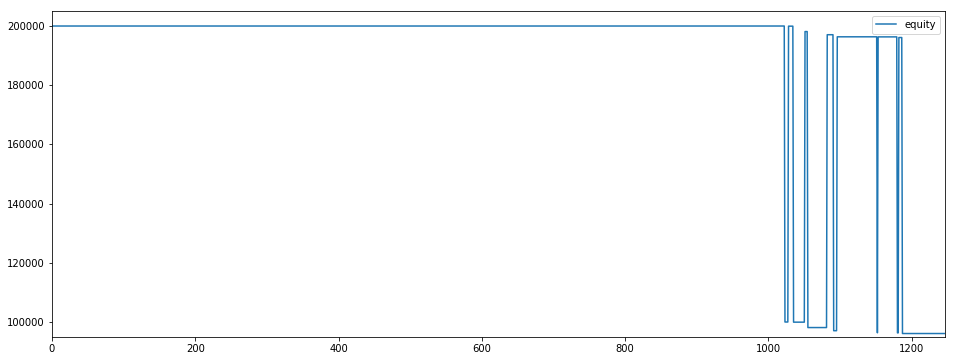

In [317]:
plt.figure(figsize=(16,6))
backtest_graph['equity'].plot(ylim=95000)
plt.legend()

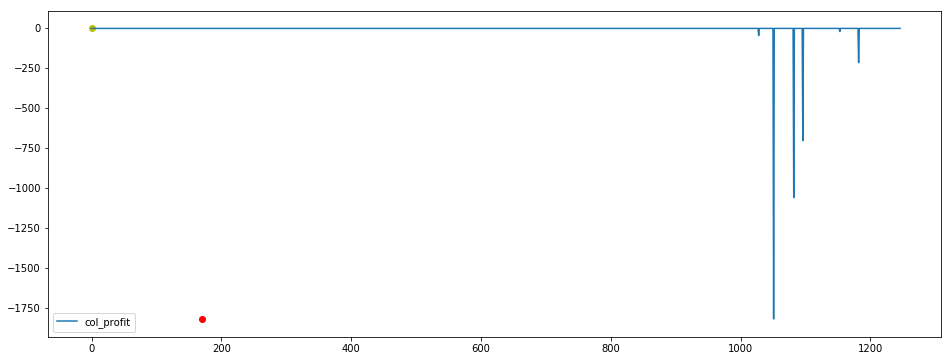

In [318]:
plt.figure(figsize=(16,6))
plt.plot(backtest_graph['col_profit'])
plt.scatter(max_gain[0],max_gain[1],c='y')
plt.scatter(max_loss[0],max_loss[1],c='r')
plt.legend()

In [319]:
cumul_profit = sum(col_profit)
nul_profit = col_profit.count(0)
len_profit = len(col_profit)

In [320]:
print('Période testée :')
print('Début : ',backtest.index[0])
print('Fin : ',backtest.index[-1])
print('ROC long : ',round(roc_long*100,2),'%')
print('ROC short : ',round(roc_short*100,2),'%')
print('Transaction à $100,000')
print('Gain généré',round(equity-200000,2))
print('Nombre de transactions : ',nb_transaction)
print('Fees : ',nb_transaction*1.5)
#print('Nombre de positions gagnées',sum(col_is_win))
#print('Nombre de positions perdues',sum(col_close_pos)-sum(col_is_win))
print('Gain maximal',round(max(col_profit),2),' ',round(max_gain[1],2))
print('Perte maximale',round(min(col_profit),2),' ',round(max_loss[1],2))
print('Moyenne du gain',(round(cumul_profit/(len_profit-nul_profit),2)))
print('Somme de tous les gains',round(gain_sum,2))
print('Somme de tous le loss',round(abs(loss_sum),2))
print('profit factor',round(abs(gain_sum/loss_sum),2))


Période testée :
Début :  2014-12-19
Fin :  2019-04-25
ROC long :  53.16 %
ROC short :  85.53 %
Transaction à $100,000
Gain généré -103893.61
Nombre de transactions :  13
Fees :  19.5
Gain maximal 0   0
Perte maximale -1818.54   -1818.54
Moyenne du gain -643.1
Somme de tous les gains 0
Somme de tous le loss 3858.63
profit factor 0.0


In [321]:
# save the model to disk
filename = 'finalized_model_long.sav'
pickle.dump(model_long, open(filename, 'wb'))
filename = 'finalized_model_short.sav'
pickle.dump(model_short, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)